# Validation Curves using Polynomial Regression

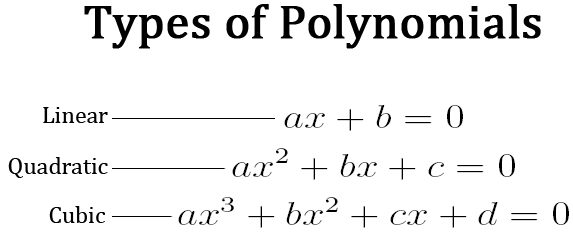

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs)) 
    #เรียงลำดับการทำงาน โดยทำ Polynomial ต่อด้วย Linear Regression
    #**kwargs คือ Parameter ที่ใช้แทน Parameter แบบระบุชื่อ กี่ตัวก็ได้ มี Type เป็น Dictionary

In [ ]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.rand(4, 1)
X

In [ ]:
X.ravel()

In [ ]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
  # randomly sample the data
  rng = np.random.RandomState(rseed) #สร้างตัวเลขสุ่มโดยมีการกระจายค่าความน่าจะเป็น และกำหนด seed เป็น rseed
  X = rng.rand(N, 1) ** 2 #ทำการสุ่มค่า x จำนวน N ตัว เป็น feature vector (n,1)
  y = 10 - 1. / (X.ravel() + 0.1) #numpy.ravel => row-major order
  if err > 0:
    y += err * rng.randn(N)
  return X, y
X, y = make_data(40)

In [ ]:
X

In [ ]:
y

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None] #สร้างอาร์เรย์ที่เป็นตัวเลขเรียงกัน โดยเริ่มต้นที่ -0.1 และสิ้นสุดที่ 1.1 จำนวน 500 ตัว
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

# Validation Curves

In [ ]:
#visualizing the validation curve
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [ ]:
#จากการ plot graph จุดที่ดีที่สุดน่าจะอยู่ที่ประมาณ 3
#plot graph

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

In [ ]:
X2, y2 = make_data(200) #สร้างข้อมูลใหม่จำนวน 200 ตัว
plt.scatter(X2.ravel(), y2);

In [ ]:
#สร้าง validation curves ของข้อมูล X2,y2  ที่สร้างขึ้นมา
degree = np.arange(21) #สร้างตัวเลขตั้งแต่ 0 ถึง 21
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')

#คำสั่งเดียวกันกับคำสั่ง visualizing the validation curve ด้านบน
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0, 1)

plt.xlabel('degree')
plt.ylabel('score');

# Learning Curves

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), 
                                       X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))


    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

พิจารณาเส้นประสีเทา
degree = 2
- เมื่อ training และ validation score เข้าใกล้กันแล้ว ต่อให้เพิ่มจำนวน training data ก็ไม่มีผลที่จะทำให้ learning curve ดีขึ้น

degree = 9
- เมื่อเพิ่มความซับซ้อนของโมเดล ทำให้ได้ค่า learning curve เพิ่มขึ้นเมื่อเทียบกับ degree = 2 
- แต่ให้สังเกตุด้วยว่าที่จำนวน training size น้อยๆ ส่งผลให้มี variance ที่สูง นั่นคือ หากข้อมูลเรามีน้อยเกินไปก็จะทำให้เกิด overfit ได้

ดังนั้น การ plot learning curve ของ model ที่เราเลือกใช้กับ dataset จะช่วยให้เราตัดสินใจเลือกใช้ model ได้ดีขึ้น


# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7) #หา best parameter สำหรับโมเดลที่เล็ก

In [ ]:
grid.fit(X, y);

In [ ]:
grid.best_params_ #แสดงค่า parameter ที่ดีที่สุด

In [ ]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);